<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
cookies_fixed = pd.read_csv("../data/cookies_fixed.csv",index_col = 0)
cookies_val_fixed = pd.read_csv("../data/cookies_validate_fixed.csv",index_col = 0)
cookies_fixed

,sugar index,bake temp,chill time,calories,grams baking soda,bake time,quality,weight,chocolate,oats,peanut_butter,raisins,nuts,butter type_melted
0,9.50,300,15.00,136.00,0.44,12.10,8,15.20,0,0,0,1,0,1
1,3.30,520,34.00,113.00,0.48,8.40,7,12.40,0,0,0,1,0,1
2,1.90,360,33.00,106.00,0.83,14.00,9,9.40,1,0,0,0,1,1
3,10.50,490,41.00,124.00,0.35,10.50,7,12.20,1,0,0,0,0,1
4,2.40,770,6.00,33.00,0.57,9.40,5,19.80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,2.00,390,15.00,88.00,0.60,11.50,6,11.60,0,0,1,0,0,0
5194,1.50,490,10.00,97.00,0.44,10.70,8,10.00,0,0,0,1,0,1
5195,14.30,480,79.00,149.00,0.37,9.70,7,13.40,1,1,0,0,0,1
5196,1.40,560,35.00,136.00,0.78,10.30,8,13.80,1,0,0,0,0,1


<AxesSubplot:>

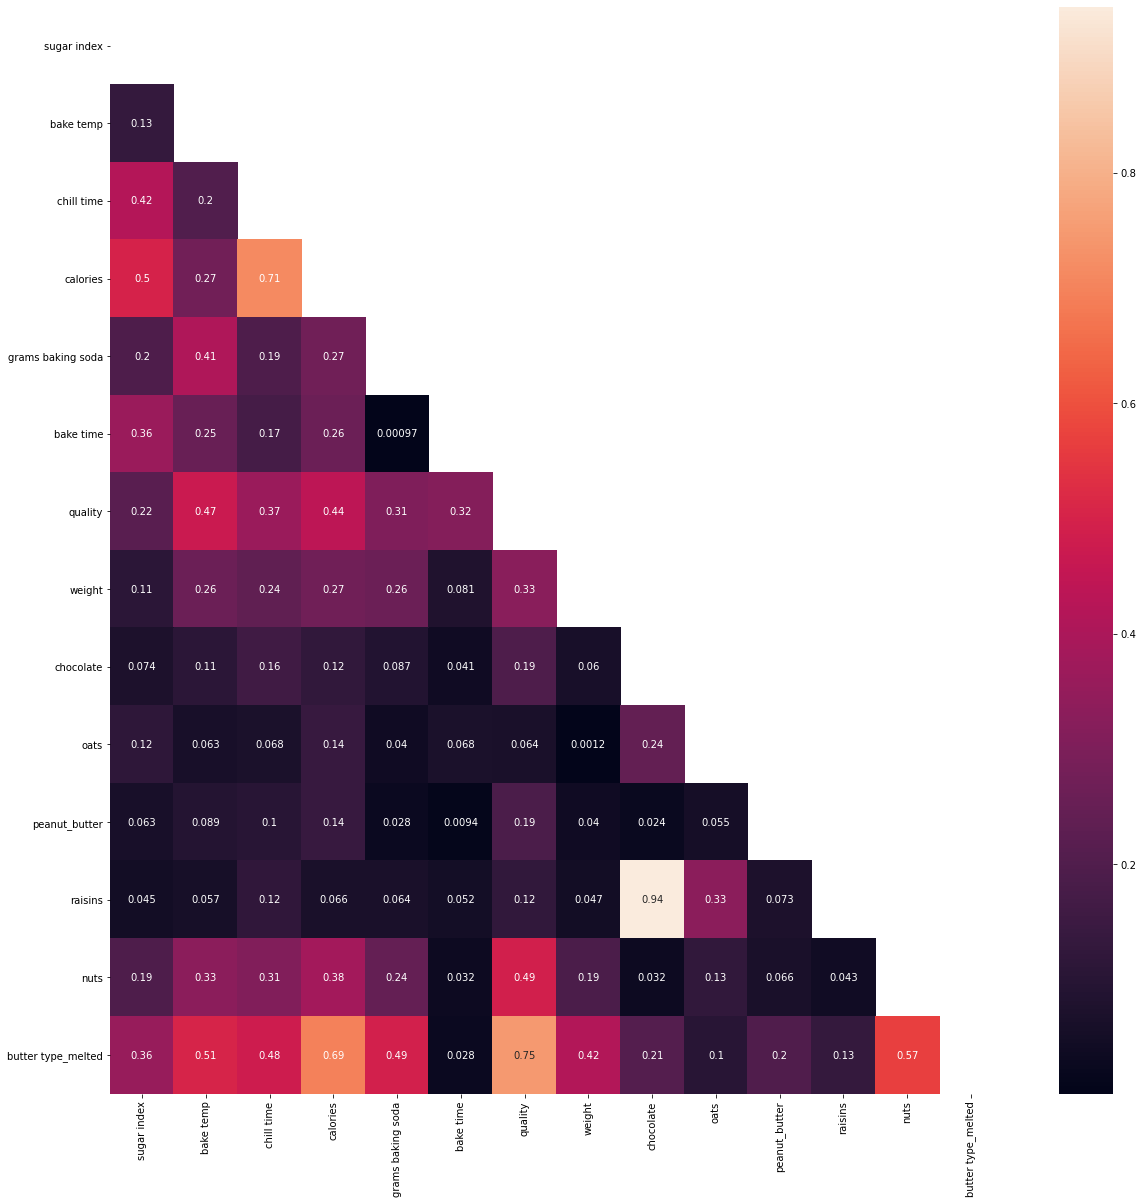

In [48]:
c = abs(cookies_fixed.corr())
fig_dims = (20, 20)
mask = np.triu(np.ones_like(c, dtype=bool))
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(c, annot=True,ax = ax, mask=mask)

In [49]:
from sklearn.model_selection import cross_validate as cv

In [51]:
X = cookies_fixed.drop(columns = ['quality', 'raisins','peanut_butter', 'oats', "chocolate"])
y = cookies_fixed['quality']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=3)

dt_model.fit(X, y)

y_pred = dt_model.predict(X)




In [53]:
y_pred

array([8.38888889, 7.65749235, 8.38888889, ..., 7.65749235, 7.65749235,
       6.34172662])

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def performance_model(y_train, y_pred_train):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    
    MSE_train = mean_squared_error(y_train,y_pred_train)

    RMSE_train = np.sqrt(MSE_train)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)

    R2_train = r2_score(y_train,y_pred_train)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train]})
    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})

    return performance, df_train

performance, _ = performance_model(y, y_pred)
performance

,Error_metric,Train
0,Mean error,0.00
1,Mean absolute error,0.63
2,Mean squared error,0.59
3,Root mean squared error,0.77
4,Mean absolute percentual error,8.85
5,R2,0.65


In [55]:
performance, _ = performance_model(y, y_pred)
performance

,Error_metric,Train
0,Mean error,0.00
1,Mean absolute error,0.63
2,Mean squared error,0.59
3,Root mean squared error,0.77
4,Mean absolute percentual error,8.85
5,R2,0.65


In [73]:

y_pred_list = []

for i in range(1,26):
    dt_model = DecisionTreeRegressor(max_depth=i)
    dt_model.fit(X, y)
    y_pred = dt_model.predict(X)
    y_pred_list.append(y_pred)

In [74]:
mse_list = []
rmse_list = []
R2_list = []
for yp in y_pred_list:
    MSE = mean_squared_error(y,yp)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y,yp)
    mse_list.append(MSE)
    R2_list.append(R2)
    rmse_list.append(RMSE)

In [82]:
mse_list 

[0.7486361163861962,
 0.6284071971945322,
 0.5866581407785697,
 0.5474721615232955,
 0.5171162711525874,
 0.4817287819709426,
 0.4465053254493009,
 0.40194091318934644,
 0.35573418530108025,
 0.3088337121170309,
 0.2668672163133591,
 0.22492522091194694,
 0.1872250115360829,
 0.15274162350653503,
 0.12207280770279243,
 0.08953056903966028,
 0.06276294748287774,
 0.04338660489538806,
 0.029131123648433448,
 0.017679164595804285,
 0.009791397712435113,
 0.004610234066858456,
 0.0017047490421983958,
 0.00045018972281175634,
 0.0]

In [83]:
rmse_list

[0.8652376068954679,
 0.7927213868658598,
 0.7659361205600437,
 0.7399136176090392,
 0.7191079690509538,
 0.6940668425814207,
 0.6682105397622077,
 0.633988101772696,
 0.596434560786915,
 0.5557280918911972,
 0.5165919243594107,
 0.474262818394977,
 0.4326950560568989,
 0.39082172854964836,
 0.34938919230965404,
 0.2992165921864299,
 0.2505253429952302,
 0.20829451479908936,
 0.1706784217422737,
 0.13296301965510668,
 0.098951491714047,
 0.06789870445640665,
 0.04128860668754028,
 0.021217674773918,
 0.0]

In [84]:
R2_list

[0.5588951007156628,
 0.6297353449014582,
 0.6543343629323746,
 0.6774231868007639,
 0.6953092220474926,
 0.7161599324390048,
 0.7369139929249269,
 0.7631718505827749,
 0.7903973792545683,
 0.8180316705309534,
 0.8427588063177682,
 0.8674715061894107,
 0.8896848975764222,
 0.9100029013045642,
 0.9280733157691812,
 0.9472475722521301,
 0.9630193587749096,
 0.974436119813385,
 0.982835611211211,
 0.98958323550284,
 0.9942307973029069,
 0.9972835977463185,
 0.9989955425097657,
 0.9997347431041688,
 1.0]

In [118]:
from sklearn.model_selection import GridSearchCV
#parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 2, 4, 8, 16, 32], 'gamma': [0.125, 0.25, 0.5, 1, 2, 4]}
clf = GridSearchCV(DecisionTreeRegressor(), {"max_depth":list(range(1,26)), "splitter":('best', 'random'), "min_samples_split":list(range(10,101,5))}, cv = 20)
clf.fit(X,y)

GridSearchCV(cv=20, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25],
                         'min_samples_split': [10, 15, 20, 25, 30, 35, 40, 45,
                                               50, 55, 60, 65, 70, 75, 80, 85,
                                               90, 95, 100],
                         'splitter': ('best', 'random')})

In [119]:
clf.best_score_

0.6789513661959039

In [120]:
clf.best_estimator_

DecisionTreeRegressor(max_depth=25, min_samples_split=70, splitter='random')

In [121]:
clf.best_params_

{'max_depth': 25, 'min_samples_split': 70, 'splitter': 'random'}

In [95]:
x_test = cookies_val_fixed.drop(columns = ["quality", 'raisins','peanut_butter', 'oats', "chocolate"])

In [122]:
y_pred = clf.predict(x_test)

In [123]:
y_pred

array([ 6.92857143,  7.81818182,  7.77358491,  8.14814815,  8.17777778,
        7.58333333,  7.81818182,  6.92857143,  8.01886792,  7.62790698,
        7.88095238,  8.10344828,  7.7       ,  8.02083333,  8.28947368,
        7.45762712,  7.51282051,  8.03571429,  8.54411765,  8.21818182,
        7.59090909,  7.85454545,  8.06666667,  8.        ,  7.11111111,
        7.11111111,  7.        ,  7.85454545,  7.11111111,  8.08474576,
        8.01886792,  8.10344828,  7.45762712,  8.57142857,  8.28947368,
        8.03571429,  8.53030303,  8.56      ,  7.07692308,  7.58333333,
        8.57142857,  8.2       ,  7.55172414,  7.59090909,  7.50980392,
        7.65957447,  7.49230769,  7.84444444,  7.62264151,  7.2962963 ,
        8.08474576,  6.92857143,  7.55172414,  7.50769231,  7.50769231,
        7.84444444,  8.        ,  7.59677419,  8.28787879,  8.89393939,
        7.46666667,  7.65384615,  7.31034483,  8.06666667,  8.27272727,
        7.59090909,  7.51282051,  7.36734694,  7.17460317,  8.53

In [124]:
cookies_val_fixed['quality'] = list(y_pred)

In [125]:
cookies_val_fixed

,sugar index,bake temp,chill time,calories,grams baking soda,bake time,quality,weight,chocolate,oats,peanut_butter,raisins,nuts,butter type_melted
0,19.25,400.00,41.00,172.00,0.67,9.70,6.93,16.60,1,0,0,0,1,1
1,1.00,520.00,35.00,146.00,0.44,10.00,7.82,13.80,1,0,0,0,0,1
2,10.40,440.00,20.00,142.00,0.53,10.00,7.77,17.00,1,0,0,0,0,1
3,1.10,570.00,21.00,82.00,0.46,10.90,8.15,12.40,1,1,0,0,0,1
4,13.50,600.00,52.00,192.00,0.44,9.10,8.18,14.80,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1.90,780.00,18.00,30.00,0.75,9.80,5.11,13.80,1,1,0,0,1,0
775,5.20,940.00,19.00,98.00,0.52,9.60,4.00,14.80,0,1,0,0,1,0
776,2.10,600.00,6.00,13.00,0.61,10.00,5.80,12.40,0,1,0,0,1,0
777,2.30,670.00,19.00,32.00,0.57,11.00,5.21,13.40,0,0,1,0,0,0


In [126]:
cookies_val_fixed.describe()

,sugar index,bake temp,chill time,calories,grams baking soda,bake time,quality,weight,chocolate,oats,peanut_butter,raisins,nuts,butter type_melted
count,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00
mean,6.38,480.42,34.30,129.19,0.51,10.61,7.73,14.02,0.70,0.19,0.01,0.29,0.15,0.91
std,5.52,225.93,20.17,50.68,0.13,1.23,0.86,2.27,0.46,0.39,0.08,0.46,0.36,0.29
min,0.60,120.00,2.00,8.00,0.23,8.50,4.00,9.40,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.90,360.00,21.00,98.00,0.42,9.50,7.47,12.60,0.00,0.00,0.00,0.00,0.00,1.00
50%,4.80,430.00,33.00,128.00,0.50,10.50,7.88,13.60,1.00,0.00,0.00,0.00,0.00,1.00
75%,10.00,520.00,45.00,162.00,0.58,11.50,8.28,14.80,1.00,0.00,0.00,1.00,0.00,1.00
max,65.80,2140.00,289.00,440.00,1.18,14.20,10.00,27.60,1.00,1.00,1.00,1.00,1.00,1.00


In [127]:
cookies_val_fixed.to_csv("../data/ypred_2.csv")

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(x_test)

clf = GridSearchCV(KNeighborsRegressor(),{'n_neighbors':list(range(1,31)),'weights':['uniform','distance'], "algorithm":('auto', 'ball_tree', 'kd_tree', 'brute'),'leaf_size':list(range(30,61,10)), "metric":('euclidean','minkowski')},cv=20)
clf.fit(X_scaled,y)

GridSearchCV(cv=20, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [30, 40, 50, 60],
                         'metric': ('euclidean', 'minkowski'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [132]:
clf.best_score_

0.7673369740349353

In [133]:
clf.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'n_neighbors': 30,
 'weights': 'distance'}

In [137]:
ypred2 = clf.predict(X_test_scaled)

In [138]:
cookies_val_fixed['quality'] = list(ypred2)

In [139]:
cookies_val_fixed

,sugar index,bake temp,chill time,calories,grams baking soda,bake time,quality,weight,chocolate,oats,peanut_butter,raisins,nuts,butter type_melted
0,19.25,400.00,41.00,172.00,0.67,9.70,7.37,16.60,1,0,0,0,1,1
1,1.00,520.00,35.00,146.00,0.44,10.00,7.90,13.80,1,0,0,0,0,1
2,10.40,440.00,20.00,142.00,0.53,10.00,7.75,17.00,1,0,0,0,0,1
3,1.10,570.00,21.00,82.00,0.46,10.90,7.93,12.40,1,1,0,0,0,1
4,13.50,600.00,52.00,192.00,0.44,9.10,7.00,14.80,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1.90,780.00,18.00,30.00,0.75,9.80,5.00,13.80,1,1,0,0,1,0
775,5.20,940.00,19.00,98.00,0.52,9.60,5.65,14.80,0,1,0,0,1,0
776,2.10,600.00,6.00,13.00,0.61,10.00,5.25,12.40,0,1,0,0,1,0
777,2.30,670.00,19.00,32.00,0.57,11.00,5.64,13.40,0,0,1,0,0,0


In [140]:
cookies_val_fixed.to_csv("../data/ypred_3.csv")

In [3]:
pd.read_csv("../data/ypred_3.csv").describe()

,Unnamed: 0,sugar index,bake temp,chill time,calories,grams baking soda,bake time,quality,weight,chocolate,oats,peanut_butter,raisins,nuts,butter type_melted
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,389.000000,6.384531,480.423620,34.296534,129.188062,0.513504,10.614925,7.730437,14.015404,0.695764,0.189987,0.006418,0.293967,0.154044,0.906290
std,225.022221,5.520385,225.928988,20.170179,50.679340,0.131211,1.234559,0.882853,2.269722,0.460379,0.392543,0.079909,0.455870,0.361223,0.291612
min,0.000000,0.600000,120.000000,2.000000,8.000000,0.230000,8.500000,5.000000,9.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,194.500000,1.900000,360.000000,21.000000,98.000000,0.420000,9.500000,7.328164,12.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,389.000000,4.800000,430.000000,33.000000,128.000000,0.500000,10.500000,7.915821,13.600000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,583.500000,10.000000,520.000000,45.000000,162.000000,0.580000,11.500000,8.223257,14.800000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,778.000000,65.800000,2140.000000,289.000000,440.000000,1.180000,14.200000,10.000000,27.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
